In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
import os


In [364]:
# Loading dataset 
df = pd.read_csv('edited customer_churn_large_dataset - customer_churn_large_dataset.csv')

In [365]:
df.head().reset_index()

,index,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,0,63,Male,Los Angeles,17,73.36,236,0
1,1,62,Female,New York,1,48.76,172,0
2,2,24,Female,Los Angeles,5,85.47,460,0
3,3,36,Female,Miami,3,97.94,297,1
4,4,46,Female,Miami,19,58.14,266,0


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


In [367]:
df.isnull().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [368]:
nan_check = df.isna()

any_nan = nan_check.any().any()

if any_nan:
    print("There are NaN values in the DataFrame.")
else:
    print("No NaN values found in the DataFrame.")


No NaN values found in the DataFrame.


In [369]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,"100,000.00","100,000.00","100,000.00","100,000.00","100,000.00"
mean,44.03,12.49,65.05,274.39,0.50
std,15.28,6.93,20.23,130.46,0.50
min,18.00,1.00,30.00,50.00,0.00
25%,31.00,6.00,47.54,161.00,0.00
50%,44.00,12.00,65.01,274.00,0.00
75%,57.00,19.00,82.64,387.00,1.00
max,70.00,24.00,100.00,500.00,1.00


In [370]:
df.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')

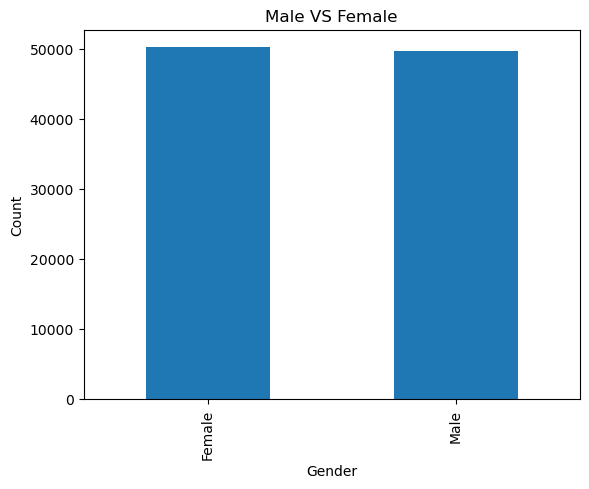

In [371]:
gender_counts = df['Gender'].value_counts()

# Creating a bar plot
gender_counts.plot(kind='bar')

plt.title('Male VS Female')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()


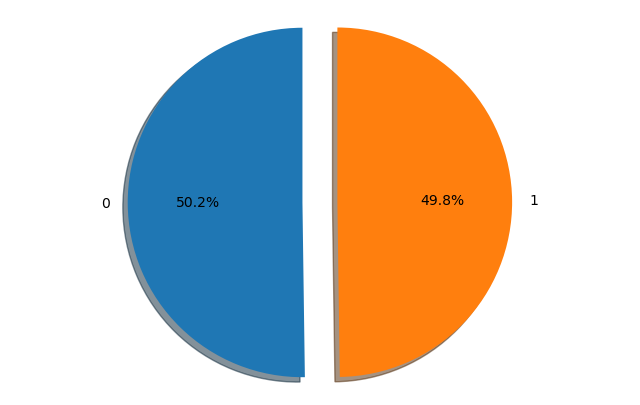

In [242]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)

# Using the unique labels as labels for the pie chart
labels = df['Churn'].value_counts().index.tolist()

# Calculating the explode values for each slice (e.g., 0.1 for all slices)
explode = [0.1] * len(labels)

# Plotting the data from df['churn'].value_counts()
patches, texts, autotexts = ax.pie(df['Churn'].value_counts(), autopct='%1.1f%%', shadow=True, 
                                   startangle=90, explode=explode, labels=labels)

# Setting the aspect ratio to be equal so that it's a circle
ax.axis('equal')

plt.show()


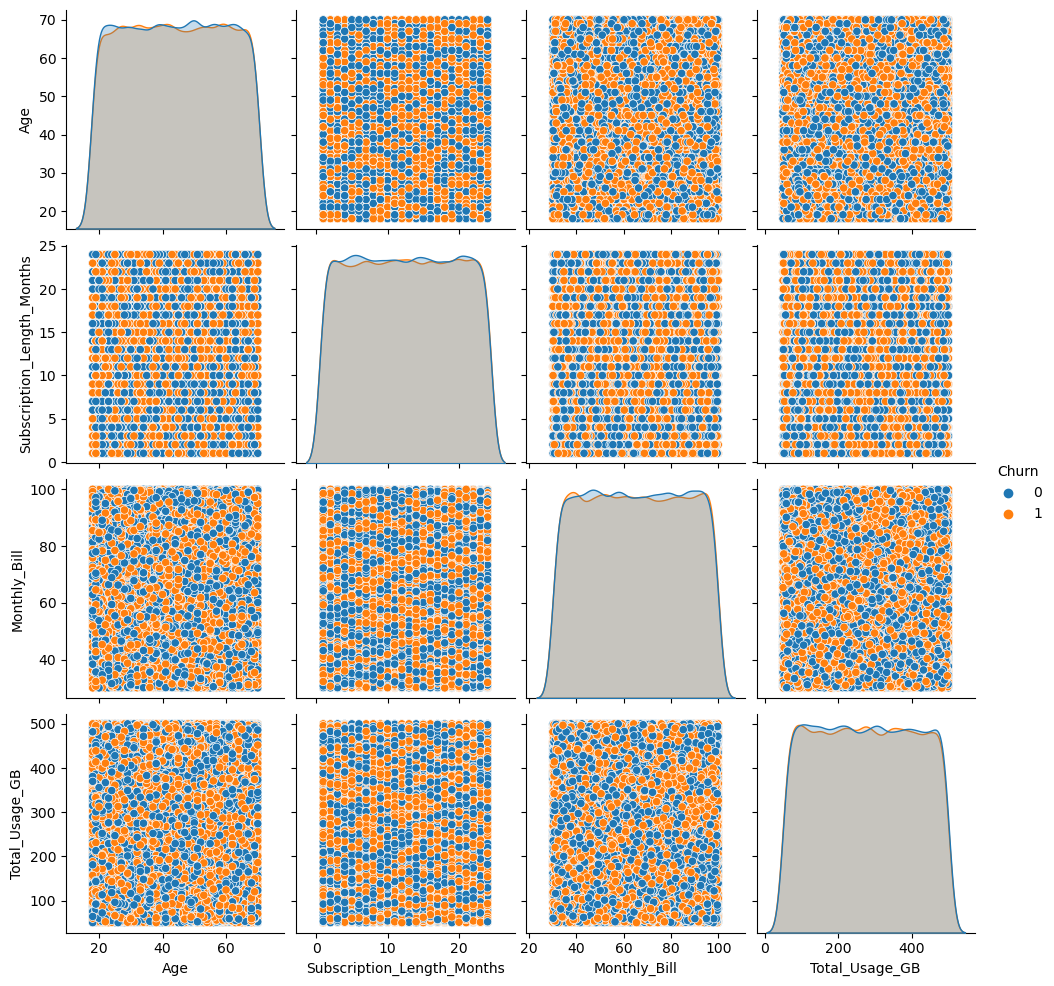

In [243]:
sns.pairplot(df, hue= 'Churn', data = df)

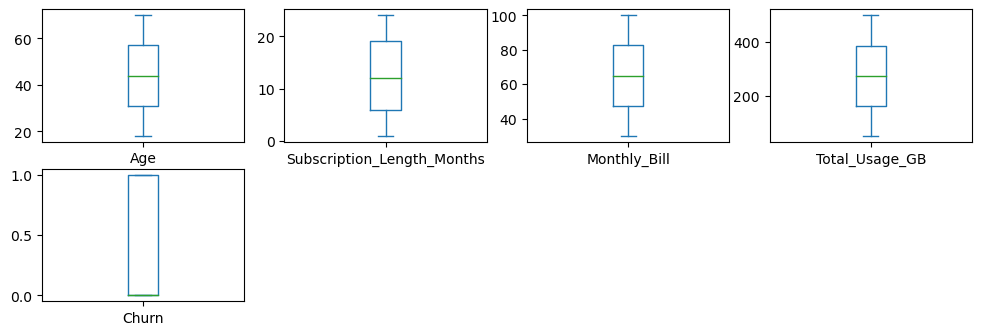

In [244]:
# Creating subplots of box plots 
df.plot.box(subplots=True, layout=(5, 4), sharex=True, figsize=(12, 10)) 
# Displaying the plots 
plt.show()

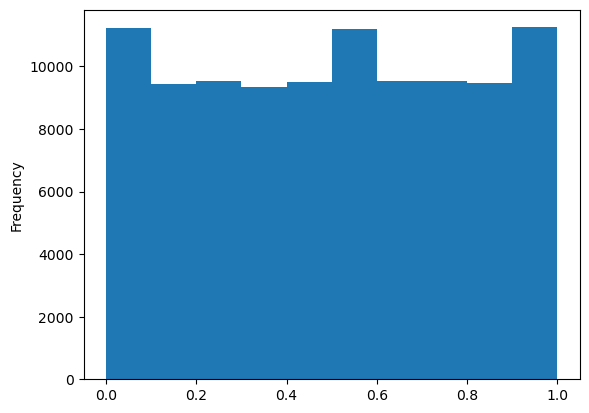

In [246]:
df_1['Age'].plot.hist(bins=10)
plt.show()

In [247]:
df_1 = df.copy()


In [372]:
df_1.rename(columns={'Subscription_Length_Months': 'Tenure'}, inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


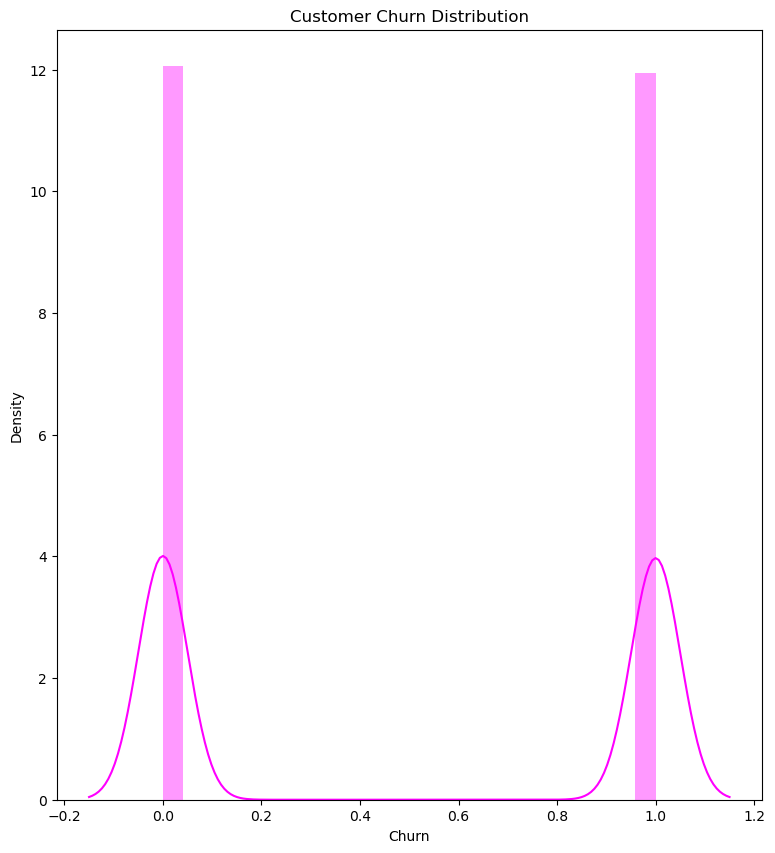

In [249]:
plt.figure(figsize= (20,10))
plt.subplot(1,2,1)
sns.distplot(df_1["Churn"],kde = True, color='magenta')
plt.title("Customer Churn Distribution")
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


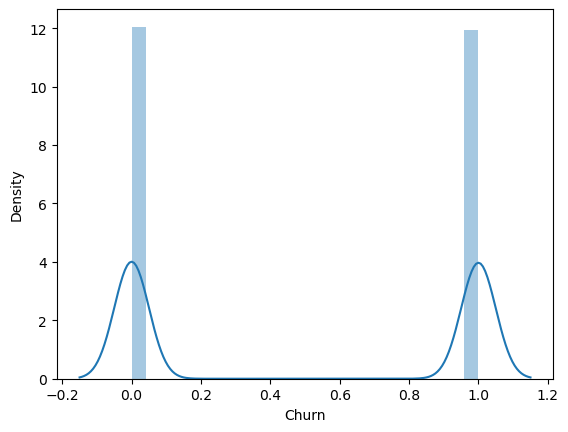

In [250]:
try:
    sns.distplot(df_1["Churn"])
except ValueError as e:
    print("Error:", e)


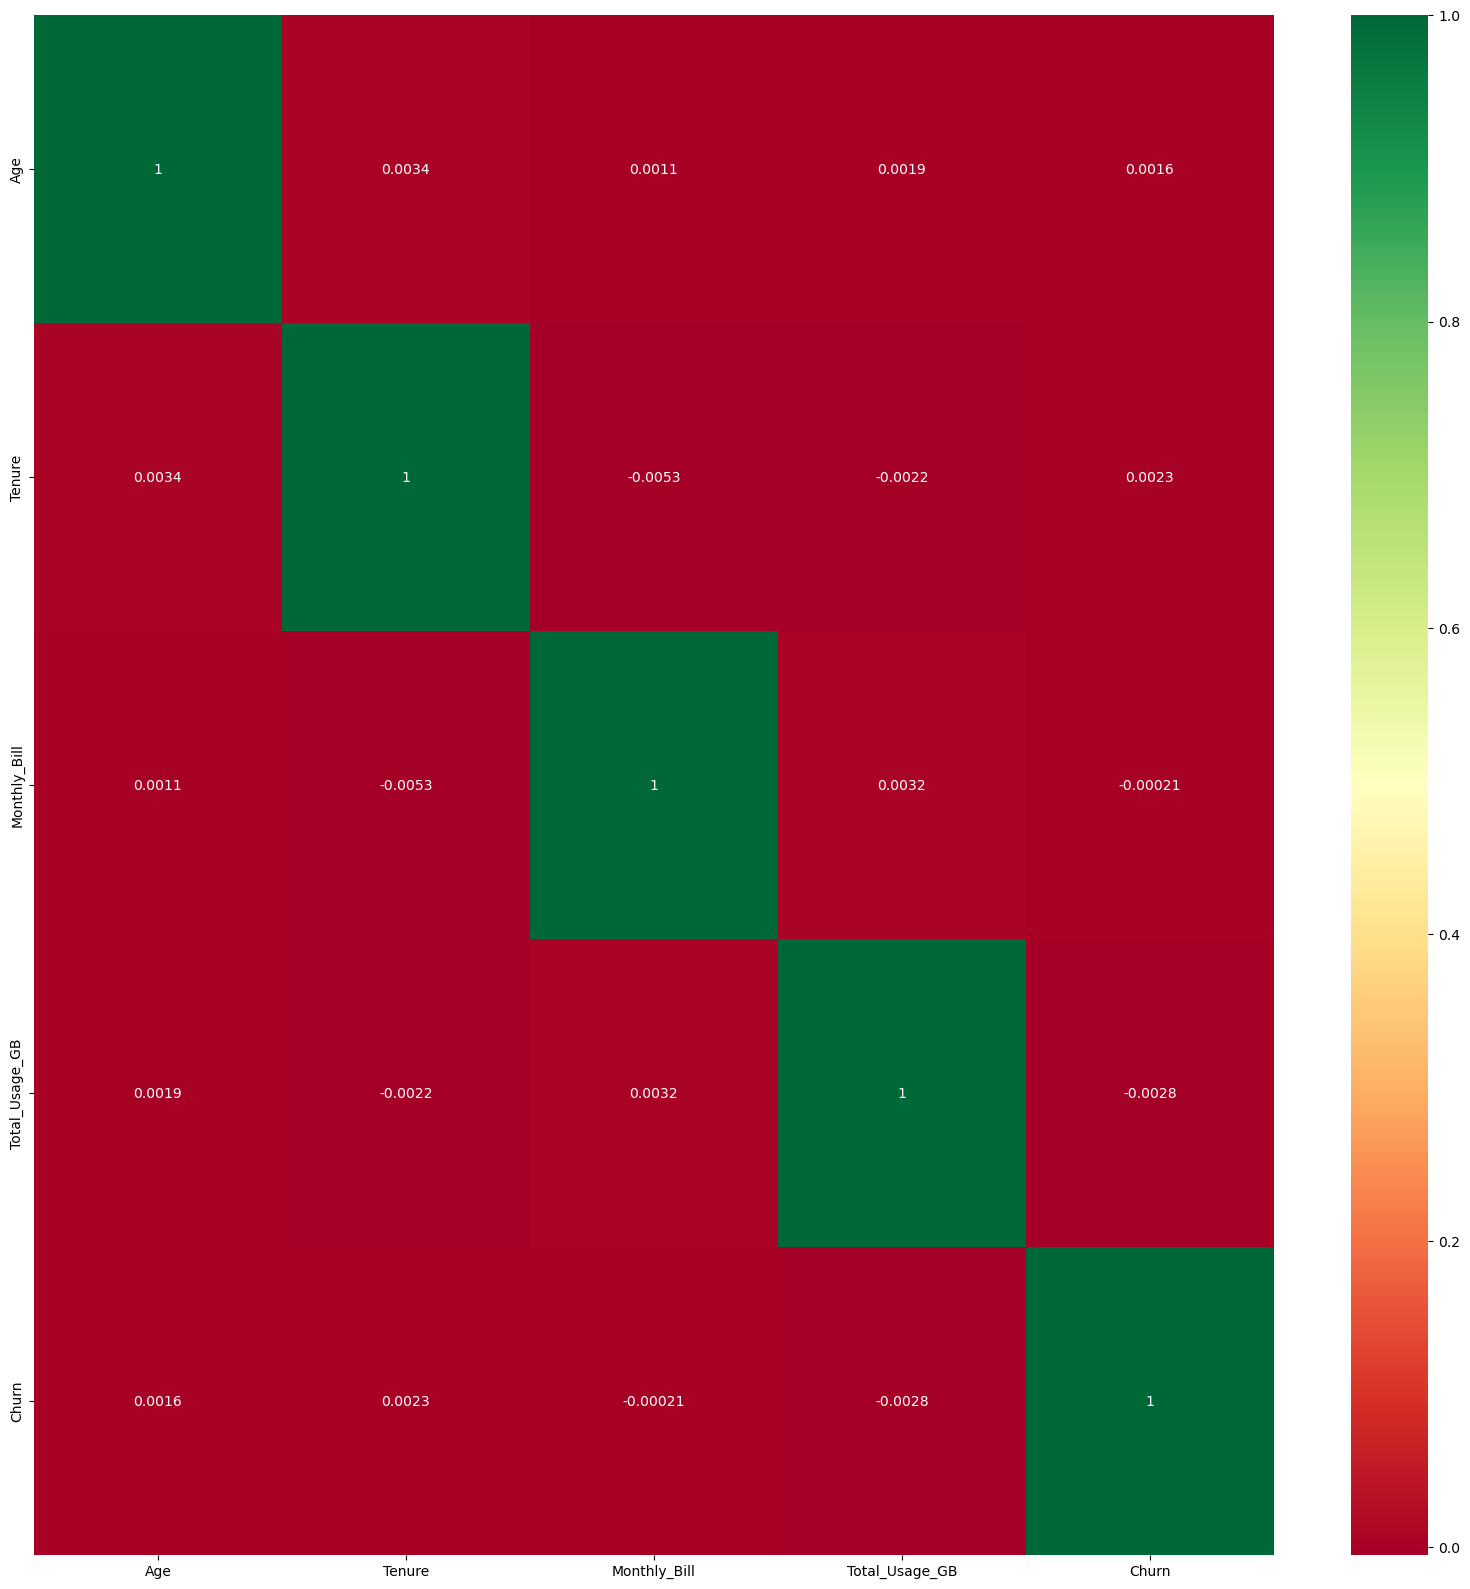

In [256]:
relation= df_1.corr()
top_corr_features = relation.index
plt.figure(figsize=(20,20))
#plotting heat map
g=sns.heatmap(df_1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [324]:
df_1.columns

Index(['Age', 'Tenure', 'Monthly_Bill', 'Total_Usage_GB', 'Churn', 'Gender_1',
       'Location_1', 'Location_2', 'Location_3', 'Location_4'],
      dtype='object')

In [325]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             100000 non-null  float64
 1   Tenure          100000 non-null  float64
 2   Monthly_Bill    100000 non-null  float64
 3   Total_Usage_GB  100000 non-null  float64
 4   Churn           100000 non-null  float64
 5   Gender_1        100000 non-null  float64
 6   Location_1      100000 non-null  float64
 7   Location_2      100000 non-null  float64
 8   Location_3      100000 non-null  float64
 9   Location_4      100000 non-null  float64
dtypes: float64(10)
memory usage: 7.6 MB


In [373]:
df_1.head()


,Age,Tenure,Monthly_Bill,Total_Usage_GB,Churn,Gender_1,Location_1,Location_2,Location_3,Location_4
0,0.87,0.70,0.62,0.41,0.00,0.00,0.00,0.00,0.00,0.00
1,0.85,0.00,0.27,0.27,0.00,1.00,1.00,0.00,0.00,0.00
2,0.12,0.17,0.79,0.91,0.00,1.00,0.00,0.00,0.00,0.00
3,0.35,0.09,0.97,0.55,1.00,1.00,0.00,1.00,0.00,0.00
4,0.54,0.78,0.40,0.48,0.00,1.00,0.00,1.00,0.00,0.00


In [386]:
 !pip install scikit-learn

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)


In [387]:
x= df_1.iloc[:,0:-1] ## Independent Features
y= df_1.iloc[:,-1] ## Dependent Variables


In [388]:
# Split data into training and testing datasets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

# Creating and fit logistic regression model
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lreg.fit(x_train, y_train)

# Making predictions using the test data
prediction = lreg.predict(x_test)

# Calculate and print metrics
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 0.2018
MSE: 0.2018
RMSE: 0.44922154890432403


In [389]:
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of prediction:", prediction.shape)


Shape of x_test: (30000, 9)
Shape of y_test: (30000,)
Shape of prediction: (30000,)


In [390]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, prediction))


              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87     23908
         1.0       0.50      0.47      0.49      6092

    accuracy                           0.80     30000
   macro avg       0.69      0.68      0.68     30000
weighted avg       0.79      0.80      0.80     30000



Text(95.72222222222221, 0.5, 'Truth')

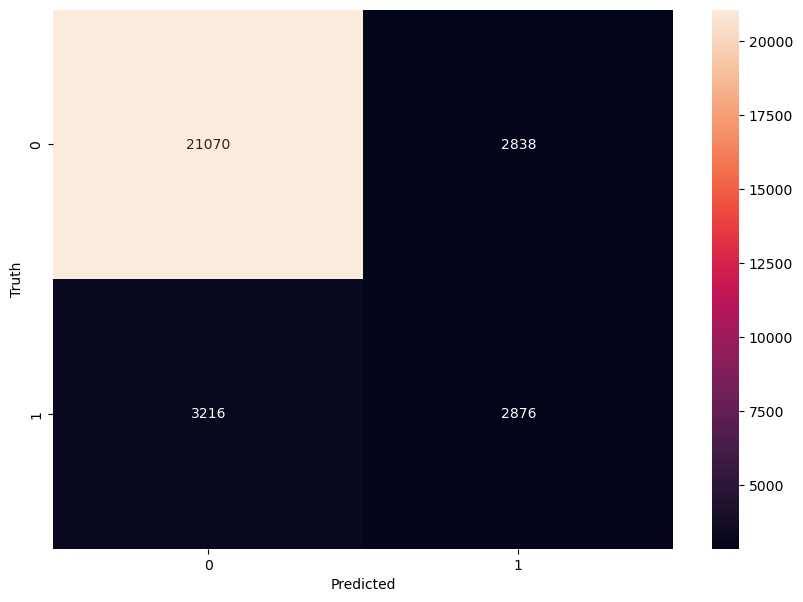

In [391]:
!pip install tensorflow
import tensorflow as tf

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=prediction)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [392]:
from sklearn.metrics import accuracy_score

In [393]:
print("Accuracy score is: ", accuracy_score(y_test,prediction)*100,"%")

Accuracy score is:  79.82000000000001 %


# Decision Tree

In [394]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

test_predict = tree.predict(x_test)

k = accuracy_score(y_test, test_predict)
print('Test accuracy_score:', k)

k = precision_score(y_test, test_predict, average='macro')
print('Test precision_score:', k)

k = recall_score(y_test, test_predict, average='macro')
print('Test recall_score:', k)


Test accuracy_score: 0.7971666666666667
Test precision_score: 0.6867742306248812
Test recall_score: 0.6871166430168788


# XGBoost 

In [395]:
from sklearn.metrics import mean_absolute_error

xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)
xgb_reg.fit(x_train, y_train)
xgb_y_pred = xgb_reg.predict(x_test)
mae = mean_absolute_error(y_test, xgb_y_pred)
print('Mean Absolute Error (MAE):', mae)


Mean Absolute Error (MAE): 0.25148513399653893


In [396]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# Calculating R-squared (R2) score
r2 = r2_score(y_test, xgb_y_pred)
print('R-squared (R2) Score:', r2)

# Calculating Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(y_test, xgb_y_pred))
print('Root Mean Squared Error (RMSE):', rmse)


R-squared (R2) Score: 0.3001297055119443
Root Mean Squared Error (RMSE): 0.33654186451115425


In [400]:
df_1['Churn'].replace(0,'no',inplace=True)
df_1['Churn'].replace(1,'yes',inplace=True)
df_1.to_csv('submission.csv', header=True, index=False)

